In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# my imports, has the cleaning + visualization libraries, as well as some models and some metrics

In [3]:
df = pd.read_csv('data/universities.csv') # reading dataset

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# having no setting for max rows and columns to look at the data with ease

In [8]:
df.info()
# looking at everything using info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [15]:
sub = df.dropna()
# dropping the Null values and storing that in the variable

In [18]:
sub.to_csv('data/cleaned_universities.csv')
# making a new csv with the variable from earlier

In [26]:
data = pd.read_csv('data/cleaned_universities.csv')
# reading in the new dataframe from the previous cell

In [28]:
data.info()
# showing the info of the new csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                471 non-null    int64  
 1   College Name              471 non-null    object 
 2   State                     471 non-null    object 
 3   Public (1)/ Private (2)   471 non-null    int64  
 4   # appli. rec'd            471 non-null    float64
 5   # appl. accepted          471 non-null    float64
 6   # new stud. enrolled      471 non-null    float64
 7   % new stud. from top 10%  471 non-null    float64
 8   % new stud. from top 25%  471 non-null    float64
 9   # FT undergrad            471 non-null    float64
 10  # PT undergrad            471 non-null    float64
 11  in-state tuition          471 non-null    float64
 12  out-of-state tuition      471 non-null    float64
 13  room                      471 non-null    float64
 14  board     

In [30]:
sns.set_style('darkgrid')

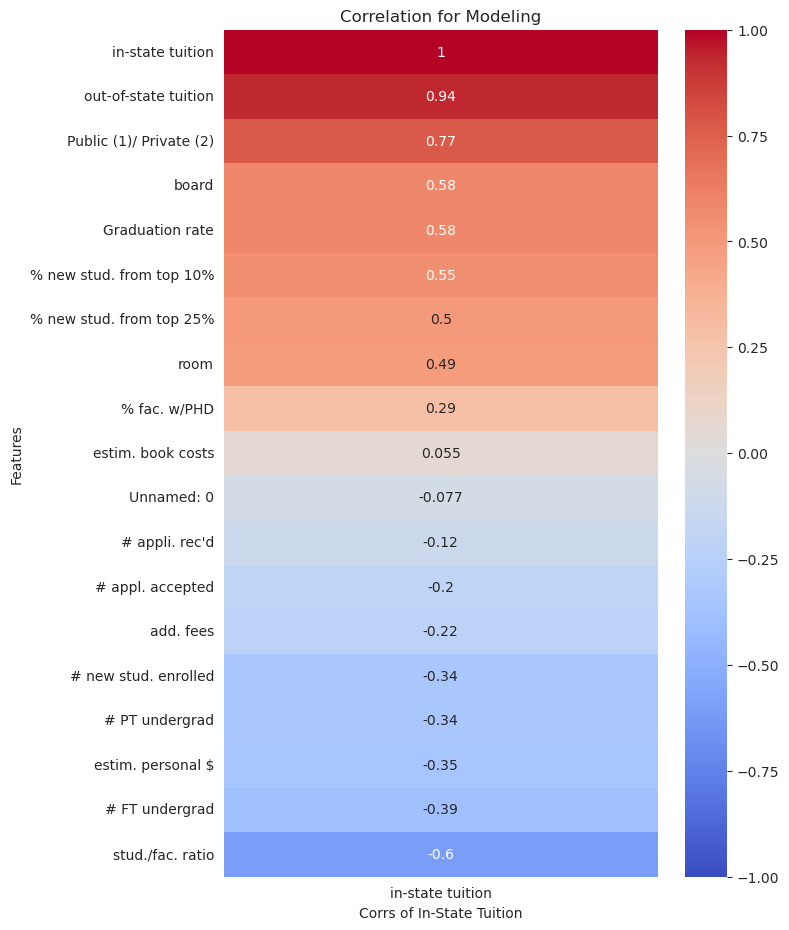

In [31]:
plt.figure(figsize= (7, 11))
sns.heatmap(data.corr(numeric_only= True)[['in-state tuition']].sort_values(by = 'in-state tuition', ascending = False), 
           annot = True, 
           vmin = -1, 
           vmax = 1, 
           cmap = 'coolwarm')
plt.title('Correlation for Modeling')
plt.xlabel('Corrs of In-State Tuition')
plt.ylabel('Features')
plt.savefig('Model_Visuals/correlation_of_tuition_and_features.png')
# making a heatmap of the new csv to showcase correlations so that I can make good predictions